K-means clustering
---
___
**Riddhi Tanna**

**201801427**

# Importing the required libraries

In [258]:
import numpy as np 
import random 
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import pairwise_distances_argmin
import sklearn as sk
from sklearn.decomposition import PCA

In [259]:
X = np.array([10,14,8,12,15,12,15,17,5,18,22,25,35,21,39,27,25,33,30,36])
Y = np.array([8,25,10,30,35,12,14,15,22,32,2,21,35,7,15,29,33,23,17,11])

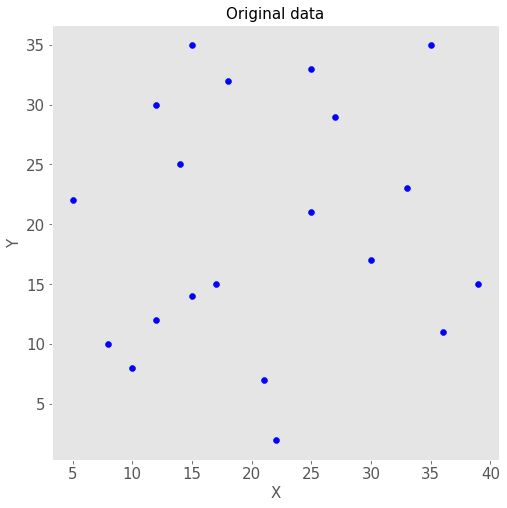

In [260]:
# plotting the scatter plot 
fig, ax = plt.subplots(figsize=[8,8])
plt.scatter(X, Y, color='b')

plt.grid()
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Original data', fontsize = 15)
#plt.legend()
plt.show()

# Function to find clusters

In [297]:
from scipy.spatial.distance import cdist

def find_clusters(X, k, k_max, rseed=5):
    """
    I/P
    X: data
    k: number of clusters
    
    O/P
    labels : labels for each data point according to the cluster it belongs to 
    centers : centers of clusters
    """
    
    # randomly choosing clusters
    distortions = []
   
    for j in range(2,k_max+1):
        r = np.random.RandomState(rseed)
        i = r.permutation(X.shape[0])[:j]
        # assigning them as centers
        centers = X[i]
        # loop till the prev centers = current centers
        while True:
            # find labels : assign the label according to min distance from center 
            labels = pairwise_distances_argmin(X, centers)
            # assign new centers
            new_centers = np.array([X[labels == i].mean(0) for i in range(j)])
            
            if j == k:
                centers_return = centers
                labels_return = labels
                
            # break 
            if np.all(centers == new_centers):
                break
            centers = new_centers
            
        distortions.append(sum(np.min(cdist(X, centers,'euclidean'), axis=1)) / X.shape[0])
    
    return centers_return.T, labels_return, distortions


# Performing K-means clustering

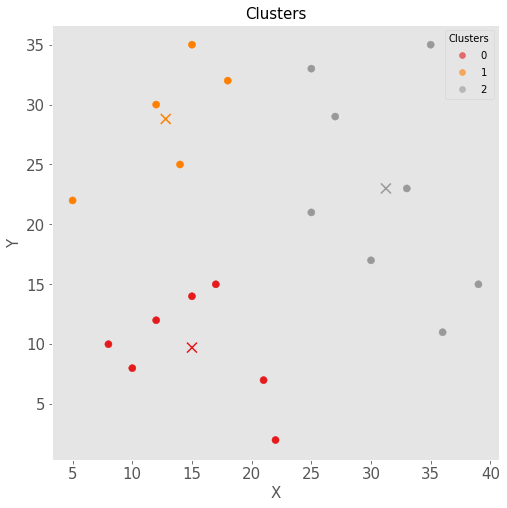

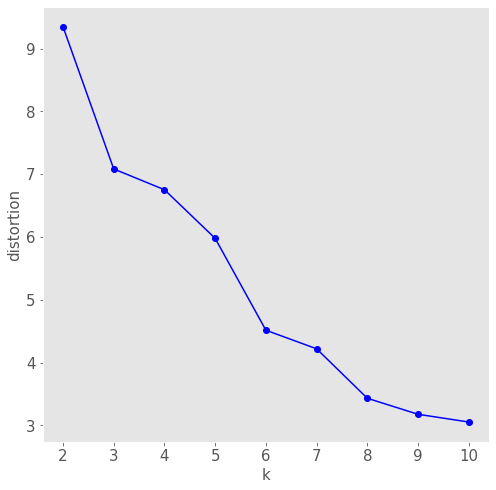

In [298]:
k_max = 10
k = 3
centers, labels, distortions = find_clusters(np.array([X,Y]).T,k, k_max)

fig, ax = plt.subplots(figsize=[8,8])
plt.style.use('ggplot')
scatter = plt.scatter(X, Y, c=labels, s=50, cmap='Set1')
plt.scatter(centers[0],centers[1], marker='x', c=np.arange(k), cmap='Set1', s=100, label='Centers')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, labels, loc="upper right", title="Clusters")
plt.grid()
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Clusters', fontsize = 15)

#plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=[8,8])
plt.plot(np.arange(2,len(distortions)+2),distortions,'b-o')
plt.grid()
plt.xlabel('k', fontsize = 15)
plt.ylabel('distortion', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We can see from the elbow curve that the optimal value for k is 3. The plot with 3 clusters is also shown above.

# Importing the digits dataset

In [309]:
from sklearn.datasets import load_digits

In [317]:
digits = load_digits()
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(digits.data)
pc_weights = pca.components_
principal_df = pd.DataFrame(data = pc_scores)

# Performing PCA on the digits dataset and reducing its dimensions

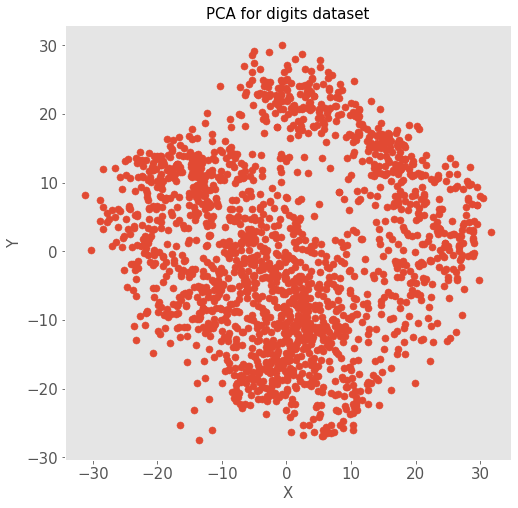

In [319]:
fig, ax = plt.subplots(figsize=[8,8])
plt.style.use('ggplot')
#scatter = plt.scatter(X[0], X[1], c=labels, s=50, cmap='Set1')
plt.scatter(principal_df[0],principal_df[1], cmap='Set1', s=50)
plt.grid()
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('PCA for digits dataset', fontsize = 15)

#plt.legend()
plt.show()

# Performing K-means clustering on digits dataset

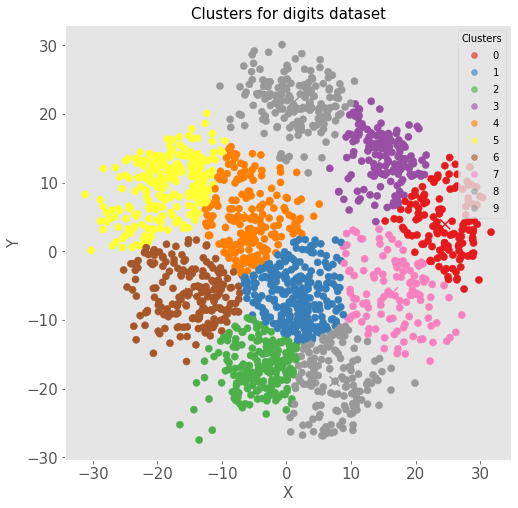

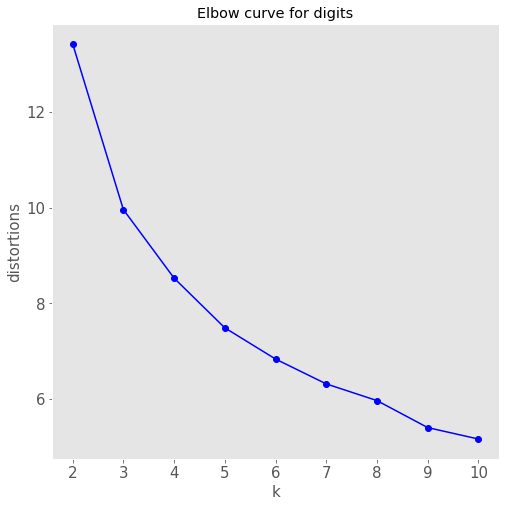

In [320]:
k_max_dig = 10
k = 10
data = np.array([principal_df[0], principal_df[1]])
centers_dig, labels_dig, distortions_dig = find_clusters(data.T,k_max_dig,k)

fig, ax = plt.subplots(figsize=[8,8])
plt.style.use('ggplot')
scatter = plt.scatter(data[0], data[1],c = labels_dig , s=50, cmap='Set1')
plt.scatter(centers_dig[0],centers_dig[1], marker='x', c=np.arange(k_max_dig), cmap='Set1', s=100, label='Centers')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, labels, loc="upper right", title="Clusters")
plt.grid()
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Clusters for digits dataset', fontsize = 15)

#plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=[8,8])
plt.plot(np.arange(2,len(distortions_dig)+2),distortions_dig, 'b-o')
plt.grid()
plt.xlabel('k', fontsize = 15)
plt.ylabel('distortions', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Elbow curve for digits')
plt.show()

We know that in the digits dataset we have 10 classes of digits so it makes sense to have 10 clusters that describe these 10 classes. 